<a href="https://colab.research.google.com/github/langodayyy/ml/blob/main/ML_TugasJS7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Lucky Kurniawan Langoday <br>
Absen: 13 <br>
NIM: 2241720168 <br>
Kelas: TI-3D <br>

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.
4. Buatlah implementasi model SOM untuk segmentasi citra lain

**Tugas no 1 - 3**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df = pd.read_csv('Mall_Customers.csv')

df.head(100)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
95,96,Male,24,60,52
96,97,Female,47,60,47
97,98,Female,27,60,50
98,99,Male,48,61,42


In [ ]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


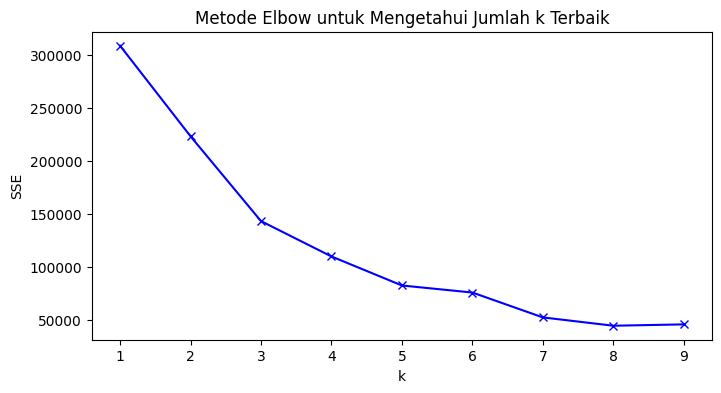

In [ ]:
# List nilai SSE
sse = []
sil = []

# Cari k terbaik dari 1-10
K = range(1,10)

# Cek nilai SSE setiap k
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    sse.append(kmeanModel.inertia_)


# Plotting the distortions
plt.figure(figsize=(8,4))
plt.plot(K, sse, "bx-")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("Metode Elbow untuk Mengetahui Jumlah k Terbaik")
plt.show()

In [ ]:
# Cek Nilai SSE setiap k
for idx, sse_val in enumerate(sse, start=1):
    print(f'k={idx}; SSE={sse_val}')

k=1; SSE=308812.7800000001
k=2; SSE=223340.65054945066
k=3; SSE=143342.75157170597
k=4; SSE=109997.0887226427
k=5; SSE=82608.63809385581
k=6; SSE=75949.76894091419
k=7; SSE=52494.626501314175
k=8; SSE=44638.065061517445
k=9; SSE=45894.80401717847


In [ ]:
cl_kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

df['Cluster'] = cl_kmeans.labels_

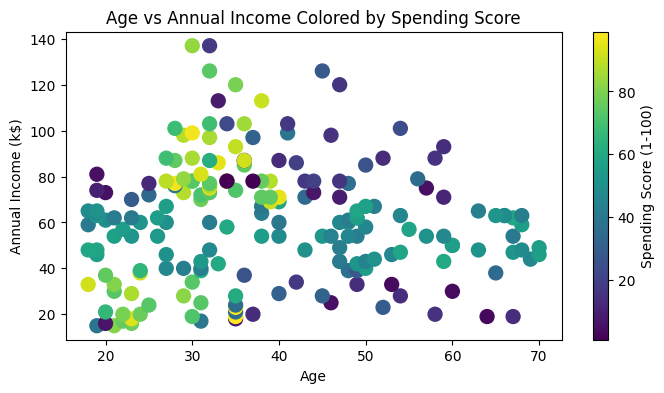

In [ ]:
plt.figure(figsize=(8,4))
scatter = plt.scatter(df['Age'], df['Annual Income (k$)'], c=df['Spending Score (1-100)'], s=100)
plt.colorbar(scatter, label='Spending Score (1-100)')

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title('Age vs Annual Income Colored by Spending Score')

plt.show()

In [ ]:
print(f"Nilai SSE: {cl_kmeans.inertia_}")

Nilai SSE: 158744.97108013942


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.transform import resize

In [2]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [3]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [4]:
# Fungsi untuk menemukan indeks unit pemenan (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [5]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [6]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Updae parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [7]:
photo = io.imread('kucingg.webp') / 255.0

image_resized = resize(
    photo, (photo.shape[0] // 4, photo.shape[1] // 4), anti_aliasing=True
)

num_epochs = 75
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(image_resized, num_epochs, initial_learning_rate, initial_neighborhood_radius)

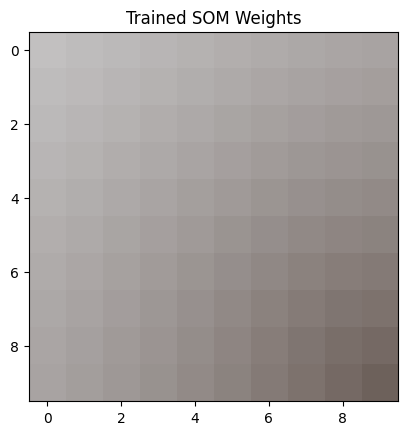

In [8]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights')
plt.show()

In [10]:
!jupyter nbconvert --to html /content/ML_TugasJS7.ipynb

[NbConvertApp] Converting notebook /content/ML_TugasJS7.ipynb to html
[NbConvertApp] Writing 769670 bytes to /content/ML_TugasJS7.html
